In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
import cv2 as cv
import time

# Support Function Area

[[0.01129725 0.01491455 0.01761946 0.01862602 0.01761946 0.01491455
  0.01129725]
 [0.01491455 0.01969008 0.02326108 0.02458993 0.02326108 0.01969008
  0.01491455]
 [0.01761946 0.02326108 0.02747972 0.02904957 0.02747972 0.02326108
  0.01761946]
 [0.01862602 0.02458993 0.02904957 0.03070911 0.02904957 0.02458993
  0.01862602]
 [0.01761946 0.02326108 0.02747972 0.02904957 0.02747972 0.02326108
  0.01761946]
 [0.01491455 0.01969008 0.02326108 0.02458993 0.02326108 0.01969008
  0.01491455]
 [0.01129725 0.01491455 0.01761946 0.01862602 0.01761946 0.01491455
  0.01129725]]


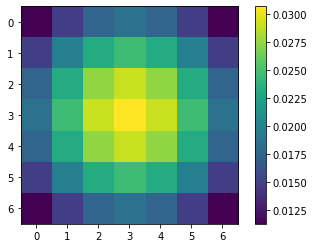

In [2]:

def gaussian_kernel(dimension_x, dimension_y, sigma_x, sigma_y):
    x = cv.getGaussianKernel(dimension_x, sigma_x)
    y = cv.getGaussianKernel(dimension_y, sigma_y)
    kernel = x.dot(y.T)
    return kernel

g_kernel = gaussian_kernel(7, 7, 3, 3)
print(g_kernel)


plt.imshow(g_kernel)
plt.colorbar()
plt.show()

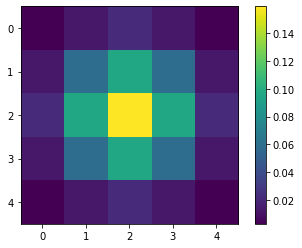

In [3]:
def MyGauss(size, sigma):
    x, y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
    g = np.exp(-((x**2 + y**2)/(2.0*sigma**2)))
    return g/(2*np.pi*sigma**2)


gaussian_kernel = MyGauss(5, 1)

plt.imshow(gaussian_kernel)
plt.colorbar()
plt.show()


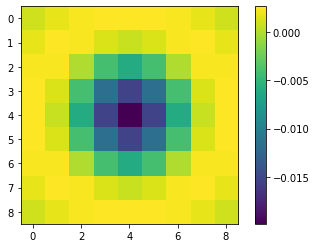

array([[ 0.00109313,  0.00185746,  0.00244954,  0.00267305,  0.00269241,
         0.00267305,  0.00244954,  0.00185746,  0.00109313],
       [ 0.00185746,  0.00262106,  0.0024484 ,  0.00142496,  0.00080734,
         0.00142496,  0.0024484 ,  0.00262106,  0.00185746],
       [ 0.00244954,  0.0024484 ,  0.        , -0.00399326, -0.00603327,
        -0.00399326,  0.        ,  0.0024484 ,  0.00244954],
       [ 0.00267305,  0.00142496, -0.00399326, -0.01162031, -0.01536213,
        -0.01162031, -0.00399326,  0.00142496,  0.00267305],
       [ 0.00269241,  0.00080734, -0.00603327, -0.01536213, -0.01989437,
        -0.01536213, -0.00603327,  0.00080734,  0.00269241],
       [ 0.00267305,  0.00142496, -0.00399326, -0.01162031, -0.01536213,
        -0.01162031, -0.00399326,  0.00142496,  0.00267305],
       [ 0.00244954,  0.0024484 ,  0.        , -0.00399326, -0.00603327,
        -0.00399326,  0.        ,  0.0024484 ,  0.00244954],
       [ 0.00185746,  0.00262106,  0.0024484 ,  0.00142496,  0

In [4]:
def l_o_g(size, sigma):
    # Formatted this way for readability
    x, y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
    nom = ( (y**2)+(x**2)-2*(sigma**2) )
    denom = ( (2*np.pi*(sigma**6) ))
    expo = np.exp( -((x**2)+(y**2))/(2*(sigma**2)) )
    return nom*expo/denom

KK = l_o_g(9, 2)
plt.imshow(KK)
plt.colorbar()
plt.show()
KK

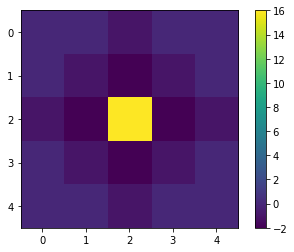

In [5]:
KK = [[0,0,-1,0,0],
      [0,-1,-2,-1,0],
      [-1,-2,16,-2,-1],
      [0,-1,-2,-1,0],
      [0,0,-1,0,0]]


plt.imshow(KK)
plt.colorbar()
plt.show()

In [6]:
def MyBGRtoGray(img, parm1 = 0.07, parm2 = 0.72, parm3 = 0.21):
  return  np.uint8(parm1 * img[:,:,0]  +  parm2 * img[:,:,1] + parm3 * img[:,:,2])



def PlotHistogram(img):
  
  Histogram = np.zeros(256)

  for i in range(np.shape(img)[0]):
    for j in range(np.shape(img)[1]):
        Histogram[np.uint8(img[i,j])] += 1
  return Histogram


# Part One: Gamma Correction 

In [7]:



def gammaCorrection(src ,gamma ,epsilon = 0 ,const = 1):
    
    table = [np.float64((const * (i / 255) ** gamma) * 255) for i in range(0,256)]
    table = np.array(table)

    return table[src]



def gammaCorrection2(src ,gamma ,epsilon = 0 ,const = 1):
  
  M = np.zeros(np.shape(src))

  for i in range(0,np.shape(src)[0]):
    for j in range(0,np.shape(src)[1]):
      M[i,j] = const * (src[i,j] + epsilon) ** gamma
      
  return M



def gammaCorrection3(src ,gamma ,epsilon = 0 ,const = 1):
    return const * (src + epsilon) ** gamma






def my_gamma(src ,gamma ,mode = 1 ,epsilon = 0 ,const = 1):
    
    if mode == 1:
      table = [np.float64((const * (i / 255) ** gamma) * 255) for i in range(0,256)]
      table = np.array(table)
      
      return table[src]
    
    if mode == 2:
      M = np.zeros(np.shape(src))
      for i in range(0,np.shape(src)[0]):
        for j in range(0,np.shape(src)[1]):
          M[i,j] = const * (src[i,j] + epsilon) ** gamma
      return M
    
    if mode == 3:
      return const * (src + epsilon) ** gamma


  

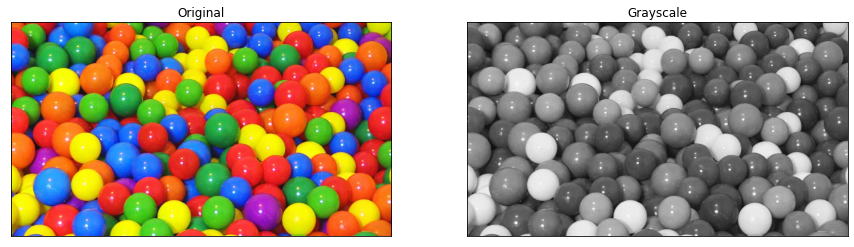

In [8]:

img = cv.imread('GammaTest.jpg')
imgGray = MyBGRtoGray(img)

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(imgGray,cmap="gray")
plt.title('Grayscale')
plt.xticks([]), plt.yticks([])
plt.show()




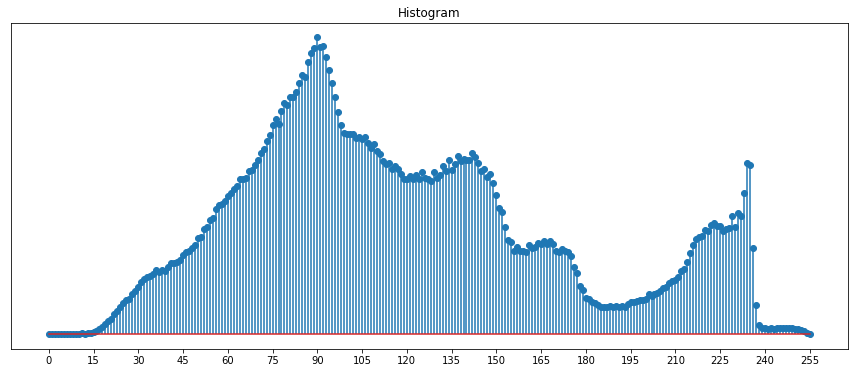

In [9]:
Histogram = PlotHistogram(imgGray)

plt.figure(figsize=(15,6))
plt.stem(range(256), Histogram, use_line_collection=True)
plt.title('Histogram')
plt.xticks(range(0,256,15)), plt.yticks([])
plt.show()

## Histograms After Gamma

### Gamma = 0.4

In [10]:

t0 = time.time()
gammaImg1 = my_gamma(imgGray, 0.4, 1)
t1 = time.time()
totalGammaImg1 = t1 - t0
print ("Mode 1 Time :" ,totalGammaImg1)


t0 = time.time()
gammaImg2 = my_gamma(imgGray, 0.4, 2)
t1 = time.time()
totalGammaImg2 = t1 - t0
print ("Mode 2 Time :" ,totalGammaImg2)


t0 = time.time()
gammaImg3 = my_gamma(imgGray, 0.4, 3)
t1 = time.time()
totalGammaImg3 = t1 - t0
print ("Mode 3 Time :" ,totalGammaImg3)





Mode 1 Time : 0.004645586013793945
Mode 2 Time : 13.062219858169556
Mode 3 Time : 0.13003087043762207


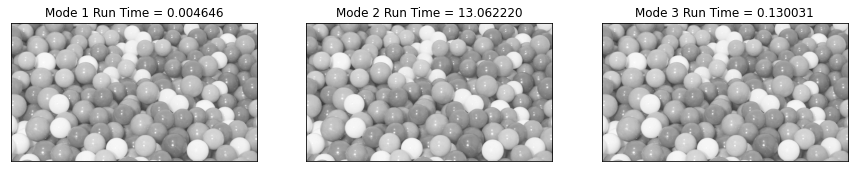

In [11]:
plt.figure(figsize=(15,15))
plt.subplot(131),plt.imshow(gammaImg1,cmap="gray")
plt.title('Mode 1 Run Time = {:6f}'.format(totalGammaImg1))
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(gammaImg2,cmap="gray")
plt.title('Mode 2 Run Time = {:6f}'.format(totalGammaImg2))
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(gammaImg3,cmap="gray")
plt.title('Mode 3 Run Time = {:6f}'.format(totalGammaImg3))
plt.xticks([]), plt.yticks([])
plt.show()

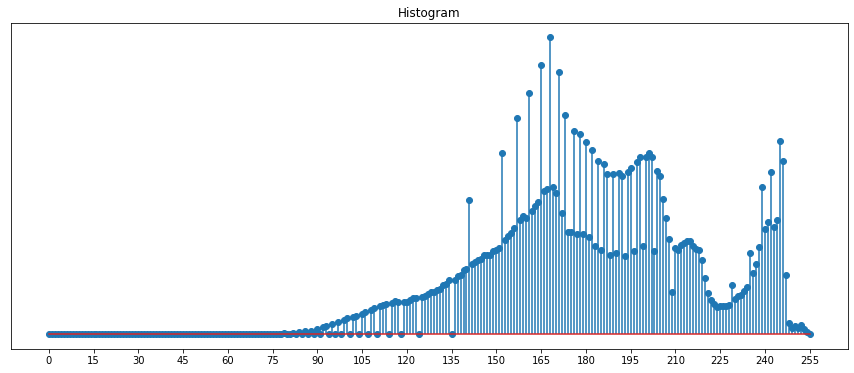

In [12]:
Histogram = PlotHistogram(gammaImg1)

plt.figure(figsize=(15,6))
plt.stem(range(256), Histogram, use_line_collection=True)
plt.title('Histogram')
plt.xticks(range(0,256,15)), plt.yticks([])
plt.show()

### Gamma = 2.5

In [13]:
t0 = time.time()
gammaImg1 = my_gamma(imgGray, 2.5, 1)
t1 = time.time()
totalGammaImg1 = t1 - t0
print ("Mode 1 Time :" ,totalGammaImg1)


t0 = time.time()
gammaImg2 = my_gamma(imgGray, 2.5, 2)
t1 = time.time()
totalGammaImg2 = t1 - t0
print ("Mode 2 Time :" ,totalGammaImg2)


t0 = time.time()
gammaImg3 = my_gamma(imgGray, 2.5, 3)
t1 = time.time()
totalGammaImg3 = t1 - t0
print ("Mode 3 Time :" ,totalGammaImg3)

Mode 1 Time : 0.005633354187011719
Mode 2 Time : 5.376826524734497
Mode 3 Time : 0.061855316162109375


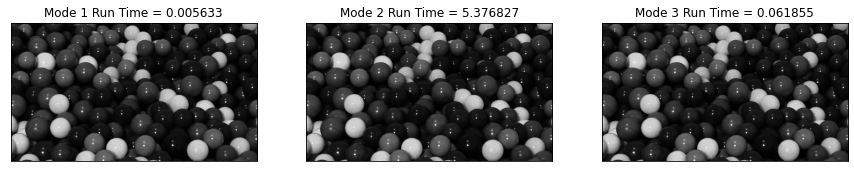

In [14]:
plt.figure(figsize=(15,15))
plt.subplot(131),plt.imshow(gammaImg1,cmap="gray")
plt.title('Mode 1 Run Time = {:6f}'.format(totalGammaImg1))
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(gammaImg2,cmap="gray")
plt.title('Mode 2 Run Time = {:6f}'.format(totalGammaImg2))
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(gammaImg3,cmap="gray")
plt.title('Mode 3 Run Time = {:6f}'.format(totalGammaImg3))
plt.xticks([]), plt.yticks([])
plt.show()

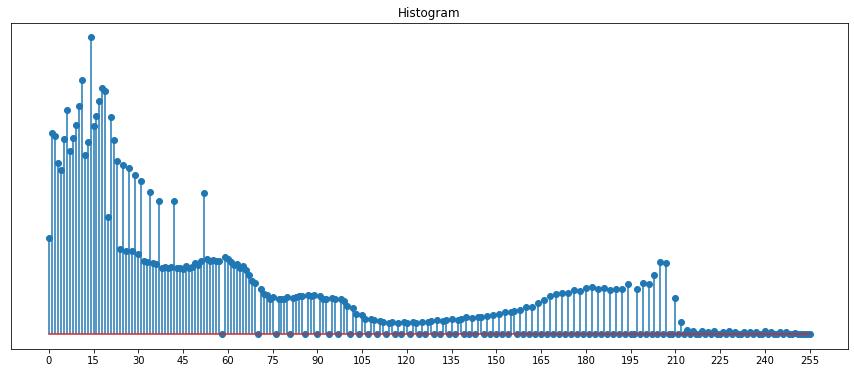

In [15]:
Histogram = PlotHistogram(gammaImg1)

plt.figure(figsize=(15,6))
plt.stem(range(256), Histogram, use_line_collection=True)
plt.title('Histogram')
plt.xticks(range(0,256,15)), plt.yticks([])
plt.show()

# Part Two : Filters

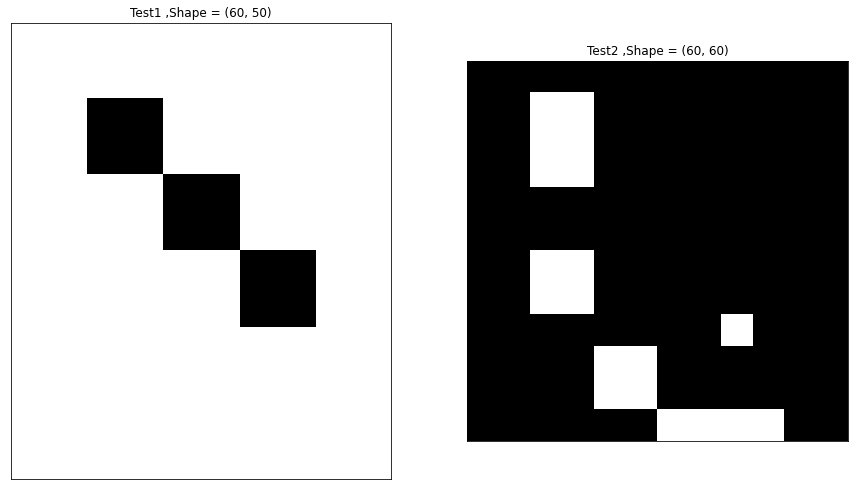

In [16]:
Test2 = np.zeros((60,60),dtype = np.uint8)
Test2[5:20,10:20] = 255
Test2[30:40,10:20] = 255
Test2[45:55,20:30] = 255
Test2[55:60,30:50] = 255
Test2[40:45,40:45] = 255

Test1 = np.ones((60,50),dtype = np.uint8) * 255
Test1[20:30,20:30] = 0
Test1[10:20,10:20] = 0
Test1[30:40,30:40] = 0

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(Test1,cmap="gray")
plt.title('Test1 ,Shape = {0}'.format(np.shape(Test1)))
plt.xticks([]), plt.yticks([])
plt.subplot(122),
plt.imshow(Test2,cmap="gray")
plt.title('Test2 ,Shape = {0}'.format(np.shape(Test2)))
plt.xticks([]), plt.yticks([])
plt.show()

In [17]:

def my_filter(img, filter):

  filter_shape = np.shape(filter)

  if filter_shape[0] != filter_shape[1]:
    return None

  paddingSize = filter_shape[0] // 2

  padding = np.zeros((img.shape[0] + paddingSize * 2 , img.shape[1] + paddingSize * 2))

  paddingRow = np.shape(padding)[0]
  paddingCol = np.shape(padding)[1]


  padding[paddingSize : paddingRow - paddingSize , paddingSize : paddingCol - paddingSize] = img 

  Final_Image = np.zeros(np.shape(padding), dtype = np.uint8)

  for row in range(paddingSize,paddingRow - paddingSize):
    for col in range(paddingSize,paddingCol - paddingSize):
      Final_Image[row, col] = (padding[row - paddingSize : row + (paddingSize + 1), col - paddingSize : col + (paddingSize + 1)] * filter).sum()

  return Final_Image[paddingSize:paddingRow - paddingSize, paddingSize:paddingCol - paddingSize]

In [18]:
kernel1 = np.ones((3,3),np.float32)/9

kernel2 = [[1,1,1],[1,-8,1],[1,1,1]]

kernel3 = [[0,0,-1,0,0],
           [0,-1,-2,-1,0],
           [-1,-2,16,-2,-1],
           [0,-1,-2,-1,0],
           [0,0,-1,0,0]]

gaussian_kernel = MyGauss(5, 1)

kernel5 = 1/16 *np.float32([[1,2,1],
                            [2,4,2],
                            [1,2,1]])

kernelDY = [[0,1,0],
            [0,-2,0],
            [0,1,0]]



kernel5

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]], dtype=float32)

In [19]:
kernel1 = np.ones((3,3),np.float32)/9

img_after_kernel1 = my_filter(Test1,kernel1)


kernel2 = [[0,0,-1,0,0],
           [0,-1,-2,-1,0],
           [-1,-2,16,-2,-1],
           [0,-1,-2,-1,0],
           [0,0,-1,0,0]]

img_after_kernel2 = my_filter(Test2,kernel2)


kernel3 = MyGauss(7, 2)
img_after_kernel3 = my_filter(Test2,kernel3)

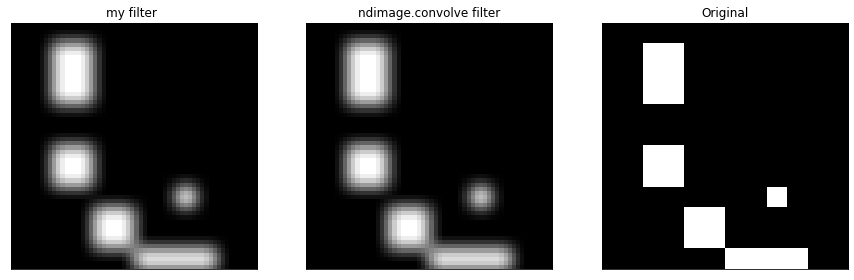

In [20]:
dst1 = ndimage.convolve(Test1, kernel1, mode='constant', cval=0)
dst2 = ndimage.convolve(Test2, kernel2, mode='constant', cval=0)


kernel3 = MyGauss(7, 2)

img_after_kernel3 = my_filter(Test2,kernel3)
dst3 = ndimage.convolve(Test2, kernel3, mode='constant', cval=0)

plt.figure(figsize=(15,15))
plt.subplot(131),plt.imshow(img_after_kernel3,cmap="gray")
plt.title('my filter ')
plt.xticks([]), plt.yticks([])
plt.subplot(132),
plt.imshow(dst3,cmap="gray")
plt.title('ndimage.convolve filter')
plt.xticks([]), plt.yticks([])
plt.subplot(133),
plt.imshow(Test2,cmap="gray")
plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.show()

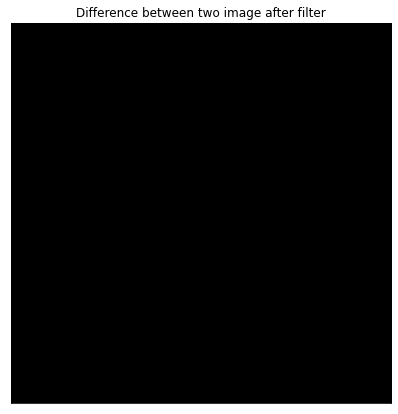

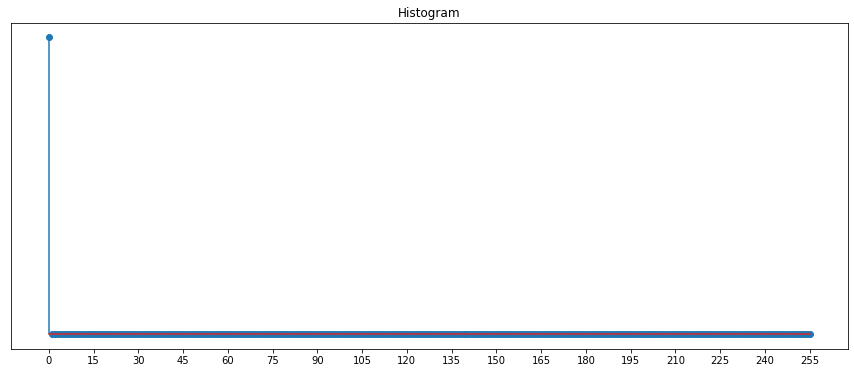

In [21]:
Difference = img_after_kernel3 - dst3

plt.figure(figsize=(7,7))
plt.imshow(Difference,cmap="gray")
plt.title('Difference between two image after filter')
plt.xticks([]), plt.yticks([])
plt.show()

Histogram = PlotHistogram(Difference)
plt.figure(figsize=(15,6))
plt.stem(range(256), Histogram, use_line_collection=True)
plt.title('Histogram')
plt.xticks(range(0,256,15)), plt.yticks([])
plt.show()

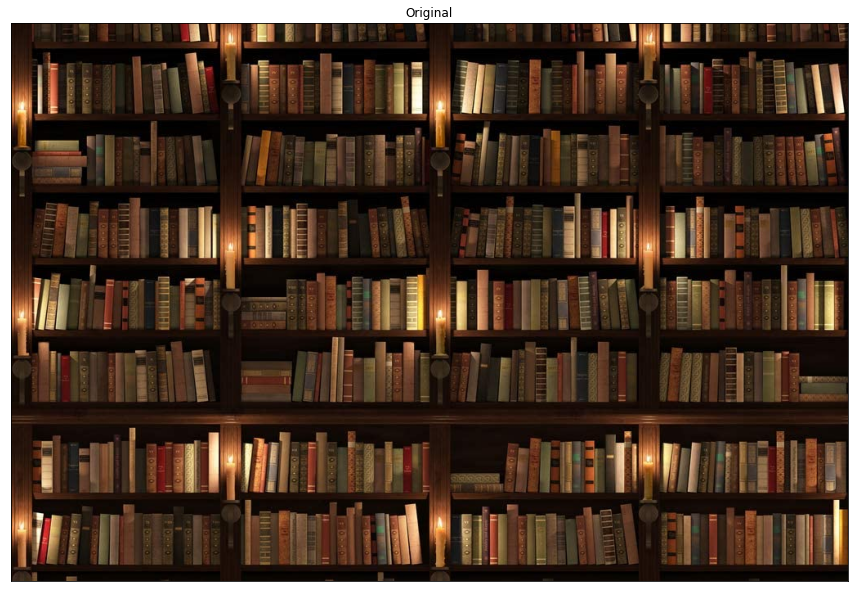

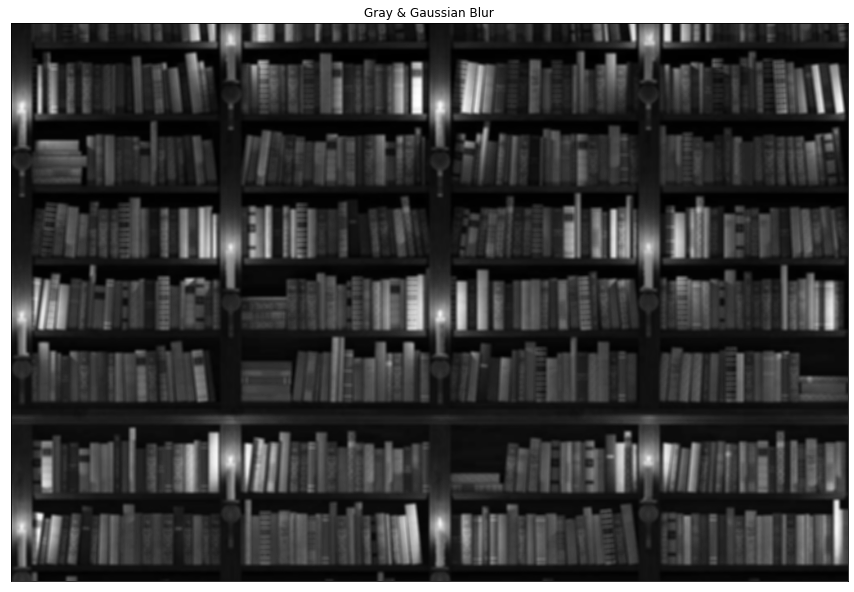

In [22]:
src = cv.imread('ZOOM_IMG.jpg')
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)

plt.figure(figsize=(15,15))
plt.imshow(src)
plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.show()


src = cv.GaussianBlur(src, (5, 5), 2)
src_gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)

plt.figure(figsize=(15,15))
plt.imshow(src_gray,cmap="gray")
plt.title('Gray & Gaussian Blur')
plt.xticks([]), plt.yticks([])
plt.show()


dst = cv.Laplacian(src_gray, -1, ksize=5)

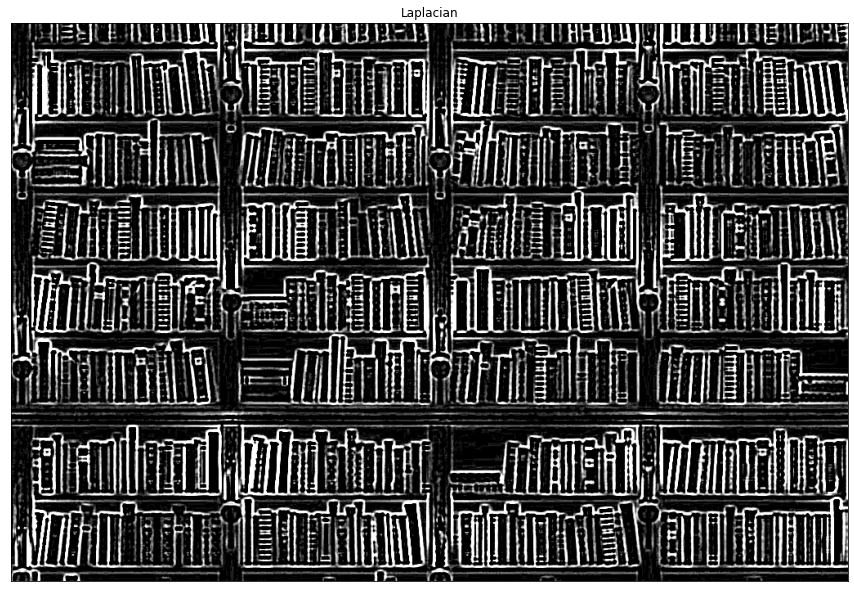

In [23]:
plt.figure(figsize=(15,15))
plt.imshow(dst,cmap="gray")
plt.title('Laplacian')
plt.xticks([]), plt.yticks([])
plt.show()

plt.show()

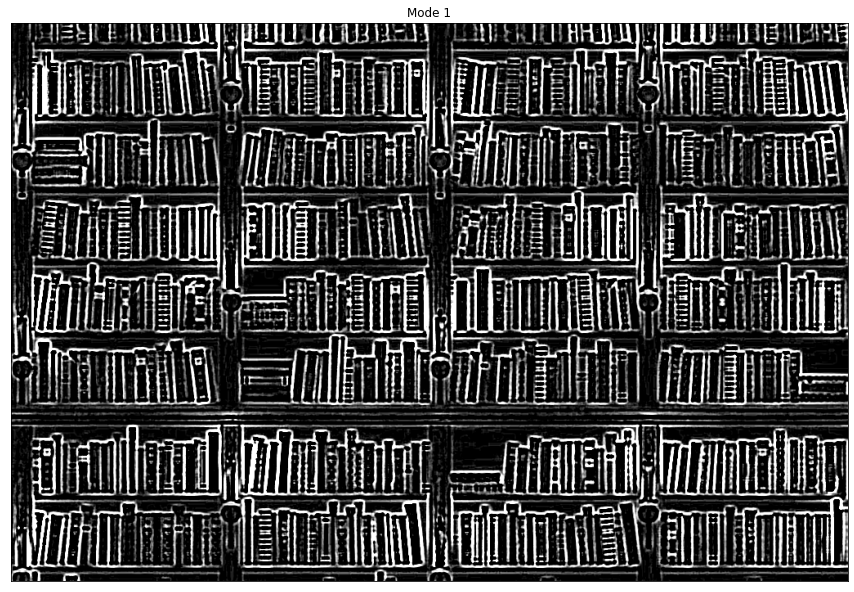

In [24]:
plt.figure(figsize=(15,15))
plt.imshow(dst,cmap="gray")
plt.title('Mode 1')
plt.xticks([]), plt.yticks([])
plt.show()

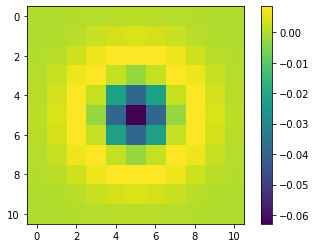

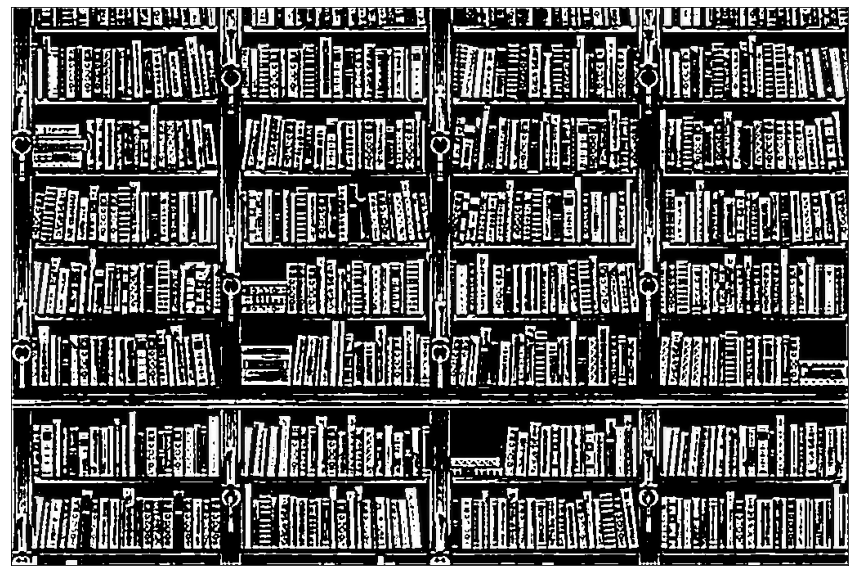

In [25]:

KK = l_o_g(11, 1.5)
plt.imshow(KK)
plt.colorbar()
plt.show()

src = cv.cvtColor(cv.imread('ZOOM_IMG.jpg'), cv.COLOR_BGR2GRAY)

img_after = my_filter(src,KK)

plt.figure(figsize=(15,15))
plt.imshow(img_after,cmap="gray")
plt.xticks([]), plt.yticks([])
plt.show()